#### Нелинейное уравнение 
### Truffic flow model


In [1]:
import numpy as np
from matplotlib.pylab import mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from matplotlib import animation
from IPython.display import HTML

In [3]:
def rho_green_light(nx,rho_light):
    rho = np.arange(nx) * 2 / nx * rho_light
    rho[int((nx-1)/2):] = 0
    return rho

In [4]:
nx = 81
nt = 30

dx = 4.0 / (nx-1)

x = np.linspace(0.0,4.0,nx)

rho_max = 10.
u_max = 1.
rho_light = 10.

rho = rho_green_light(nx, rho_light)

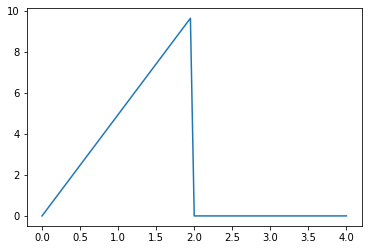

In [5]:
plt.plot(x, rho)

In [6]:
def computeF(u_max, rho_max, rho):
    return u_max*rho*(1-rho/rho_max)

In [7]:
def wave_speed(u_max, rho_max, rho):
    return u_max*(1-2*rho/rho_max)

#### Схема центральных разностей

In [8]:
def ftbs(rho,nt,dt,dx,rho_max,u_max):
    rho_n = np.zeros((nt,len(rho)))
    rho_n[0,:] = rho.copy()
    
    for t in range(1, nt):
        F = computeF(u_max,rho_max,rho)
        rho_n[t,1:] = rho[1:] - dt/dx*(F[1:] - F[:-1])
        rho_n[t,0] = rho[0]
        rho = rho_n[t].copy()
        
    return rho_n

In [9]:
sigma = 1
dt = sigma*dx

rho_n = ftbs(rho,nt,dt,dx,rho_max,u_max)

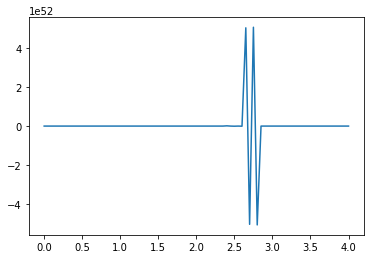

In [10]:
plt.plot(x,rho_n[nt-1])

#### Схема Годунова

In [11]:
def rho_red_light(nx, rho_max, rho_in):
    rho = rho_max*np.ones(nx)
    rho[:int((nx-1)*0.75)] = rho_in
    return rho

In [12]:
nx = 81
nt = 30
dx = 4/(nx-1)

rho_in = 5
rho_max = 10
u_max = 1

x = np.linspace(0,4,nx)
rho = rho_red_light(nx, rho_max, rho_in)


In [13]:
def flux_TE(u_max, rho_max, rho_l, rho_r):
    rho_star = 0
    uw_l , uw_r = wave_speed(u_max, rho_max, np.array([rho_l, rho_r]))
    if uw_l >= uw_r :
        s = u_max*(1-(rho_l+rho_r)/rho_max)
        rho_star = rho_l if s > 0 else rho_r
    else:
        if uw_l > 0:
            rho_star = rho_l
        if uw_r < 0:
            rho_star = rho_r
        if (uw_l < 0) and (uw_r > 0):
            rho_star = rho_max/2
    return computeF(u_max, rho_max, rho_star)

In [14]:
def godunov(rho,nt,dt,dx,rho_max,u_max):
    rho_n = np.zeros((nt,len(rho))) #двумерный массив
    rho_n[0,:] = rho.copy()
    
    for t in range(1, nt):
        F = np.zeros(nx-1)
        for i in range (nx-1):
            F[i] = flux_TE(u_max,rho_max,rho[i],rho[i+1])
        rho_n[t,1:-1] = rho[1:-1] - dt/dx*(F[1:] - F[:-1])
        rho_n[t,0] = rho[0]
        rho_n[t,-1] = rho[-2]
        rho = rho_n[t].copy()
    return rho_n

In [15]:
sigma = 1
dt = sigma*dx / u_max

rho_n = godunov(rho,nt,dt,dx,rho_max,u_max)

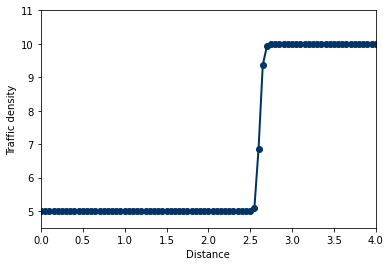

In [18]:
fig = plt.figure();
ax = plt.axes(xlim=(0,4),ylim=(4.5,11),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],'o-',color='#003366', lw=2);

sigma = 0.5
dt = sigma*dx/u_max

rho = rho_red_light(nx, rho_max, rho_in)
rho_n = godunov(rho,nt, dt, dx, rho_max, u_max)

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
HTML(anim.to_jshtml())

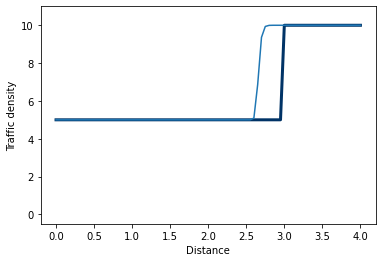

In [19]:
plt.plot(x, rho, color='#003366', ls='-', lw=3)
plt.ylabel('Traffic density')
plt.xlabel('Distance')
plt.ylim(-0.5,11.);
plt.plot(x,rho_n[25])

#### Lax-Friedrichs Scheme

In [20]:
def rho_red_light(nx, rho_max, rho_in):
    rho = rho_max*np.ones(nx)
    rho[:int((nx-1)*0.75)] = rho_in
    return rho

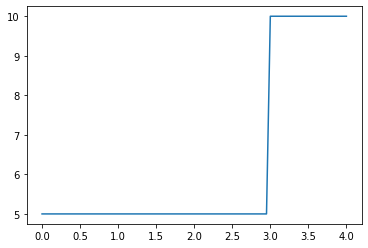

In [21]:
nx = 81
nt = 30
dx = 4/(nx-1)

rho_in = 5
rho_max = 10
u_max = 1

x = np.linspace(0,4,nx)
rho = rho_red_light(nx, rho_max, rho_in)

plt.plot(x,rho)

In [22]:
def computeF(u_max, rho_max, rho):
    return u_max*rho*(1-rho/rho_max)

In [23]:
def animate(data):
    x - np.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

In [24]:
def laxfriedrichs(rho, nt, dt, dx, rho_max, u_max):
    rho_n = np.zeros((nt, len(rho)))
    rho_n[:,:] = rho.copy()
    
    for t in range(1,nt):
        F = computeF(u_max, rho_max, rho)
        rho_n[t,1:-1] = 0.5*(rho[2:] + rho[:-2]) - dt/(2*dx)*(F[2:] - F[:-2])
        rho_n[t, 0]= rho[0]
        rho_n[t, -1] = rho[-1]
        rho = rho_n[t].copy()
    return rho_n

In [25]:
sigma = 0.5
dt = sigma*dx/u_max

rho = rho_red_light(nx, rho_max, rho_in)
rho_n = laxfriedrichs(rho,nt, dt, dx, rho_max, u_max)

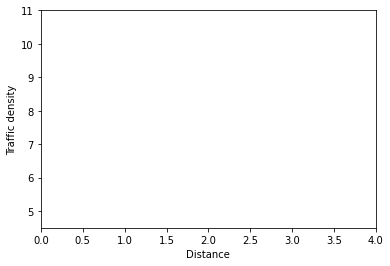

In [26]:
fig = plt.figure();
ax = plt.axes(xlim=(0,4),ylim=(4.5,11),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],'-o',color='#003366', lw=2);

In [27]:
anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
HTML(anim.to_jshtml())

#### Lax-Wendroff Scheme 

In [28]:
def Jacobian (u_max, rho_max, rho):
    return u_max*(1-2*rho/rho_max)

In [29]:
def laxwendroff(rho,nt,dt,dx,rho_max,u_max):
    rho_n = np.zeros((nt, len(rho)))
    rho_n[:,:] = rho.copy()
    
    for t in range(1,nt):
        F = computeF(u_max, rho_max, rho)
        J = Jacobian(u_max, rho_max, rho)
        rho_n[t,1:-1] = (rho[1:-1])- dt/(2*dx)*(F[2:] - F[:-2]) + dt**2/(4*dx**2)*((J[2:]+J[1:-1])*(F[2:]-F[1:-1]) - (J[1:-1] + J[:-2])*(F[1:-1] - F[:-2]))
        rho_n[t, 0]= rho[0]
        rho_n[t, -1] = rho[-1]
        rho = rho_n[t].copy()
    return rho_n

In [30]:
sigma = 0.5
dt = sigma*dx/u_max

rho = rho_red_light(nx, rho_max, rho_in)
rho_n = laxwendroff(rho,nt, dt, dx, rho_max, u_max)

In [31]:
anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
HTML(anim.to_jshtml())

#### MacCormac Scheme

In [32]:
def maccormac(rho, nt, dt, dx, rho_max, u_max):
    rho_n = np.zeros((nt,len(rho)))
    rho_star = np.empty_like(rho)
    rho_n[:,:] = rho.copy()
    rho_star = rho.copy()
    
    for t in range(1,nt):
        F = computeF(u_max, rho_max, rho)
        rho_star[:-1] = rho[:-1] - dt/dx*(F[1:] - F[:-1])
        Fstar = computeF(u_max, rho_max, rho_star)
        rho_n[t,1:] = 0.5 * (rho[1:] + rho_star[1:] - dt/dx * (Fstar[1:] - Fstar[:-1]))
        rho = rho_n[t].copy()
    return rho_n

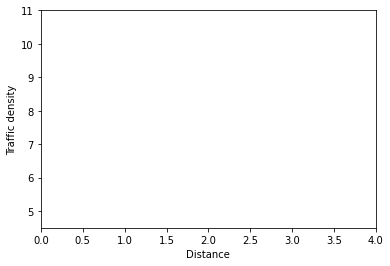

In [33]:
fig = plt.figure();
ax = plt.axes(xlim=(0,4),ylim=(4.5,11),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],'o-',color='#003366', lw=2);

In [34]:
sigma = 1
dt = sigma*dx/u_max

rho = rho_red_light(nx, rho_max, rho_in)
rho_n = maccormac(rho,nt, dt, dx, rho_max, u_max)

In [35]:
anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
HTML(anim.to_jshtml())